In [6]:
import os
import re
import time
import pandas as pd
import requests
from lxml import html
from IPython.display import display
from IPython.display import Image
from twitter import *

In [7]:
url = "http://techinterior.com.br/"
db = client['techinterior']
config = {
    "access_key": "",
    "access_secret": "",
    "consumer_key":"",
    "consumer_secret":""
}

In [8]:
page = requests.get(url)

In [9]:
print "StatusCode: ", page.status_code

StatusCode:  200


In [10]:
# Quem são os palestrantes?
parser = html.fromstring(page.content)
xpath_palestrantes = "//section[@id='speakers']/div[@class='container']/div/div[@class='col-md-10']/strong/text()"
palestrantes = parser.xpath(xpath_palestrantes)
print "** Palestrantes **"
print palestrantes

** Palestrantes **
[u'Maur\xedcio "Maujor"', 'Felipe Nascimento de Moura', 'Richard Jesus', u'Murilo Da Silva Ijanc\u2019', 'Adriano Cupello', 'Eduardo Cesar Borsato de Oliveira', 'Robson Galloppi']


In [11]:
xpath_pictures = "//section[@id='speakers']/div[@class='container']/div/div[@class='col-md-2']/figure/img/@src"
pictures = [os.path.join(url, imgurl) for imgurl in parser.xpath(xpath_pictures)]
print "** Pictures **"
print pictures

** Pictures **
['http://techinterior.com.br/assets/images/speakers/maujor.jpg', 'http://techinterior.com.br/assets/images/speakers/felipenmoura.jpg', 'http://techinterior.com.br/assets/images/speakers/richard.jpg', 'http://techinterior.com.br/assets/images/speakers/murilo.jpeg', 'http://techinterior.com.br/assets/images/speakers/adriano.jpg', 'http://techinterior.com.br/assets/images/speakers/eduardo.jpg', 'http://techinterior.com.br/assets/images/speakers/robson.jpg']


Get  http://techinterior.com.br/assets/images/speakers/maujor.jpg


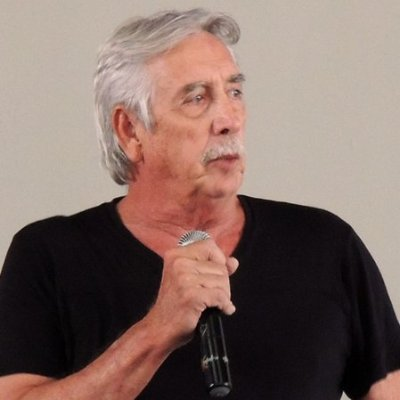

Get  http://techinterior.com.br/assets/images/speakers/felipenmoura.jpg


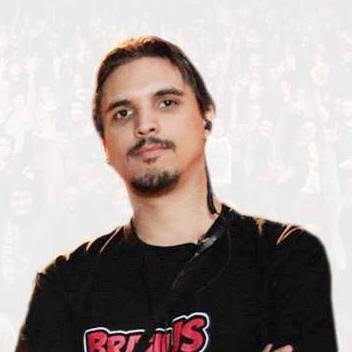

Get  http://techinterior.com.br/assets/images/speakers/richard.jpg


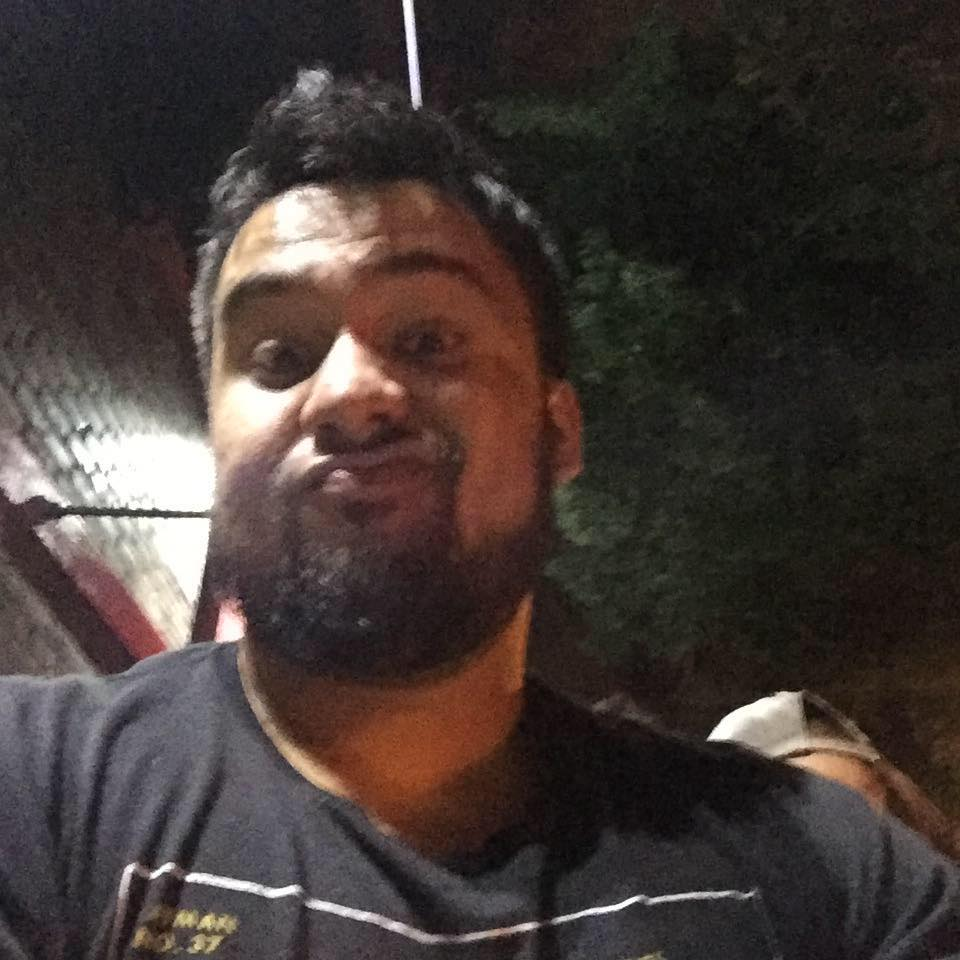

Get  http://techinterior.com.br/assets/images/speakers/murilo.jpeg


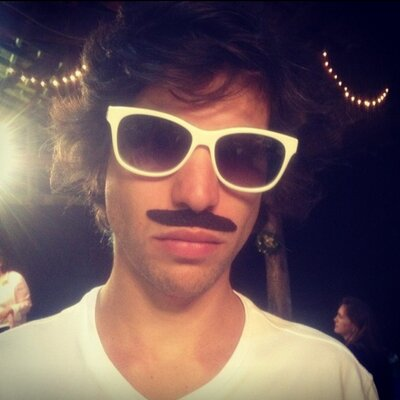

Get  http://techinterior.com.br/assets/images/speakers/adriano.jpg


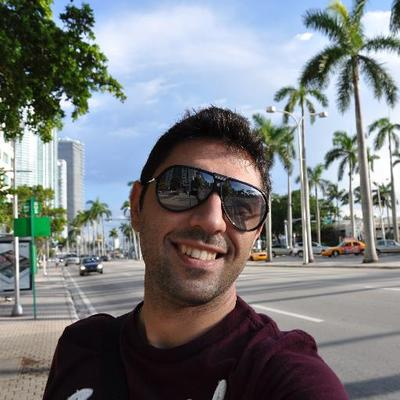

Get  http://techinterior.com.br/assets/images/speakers/eduardo.jpg


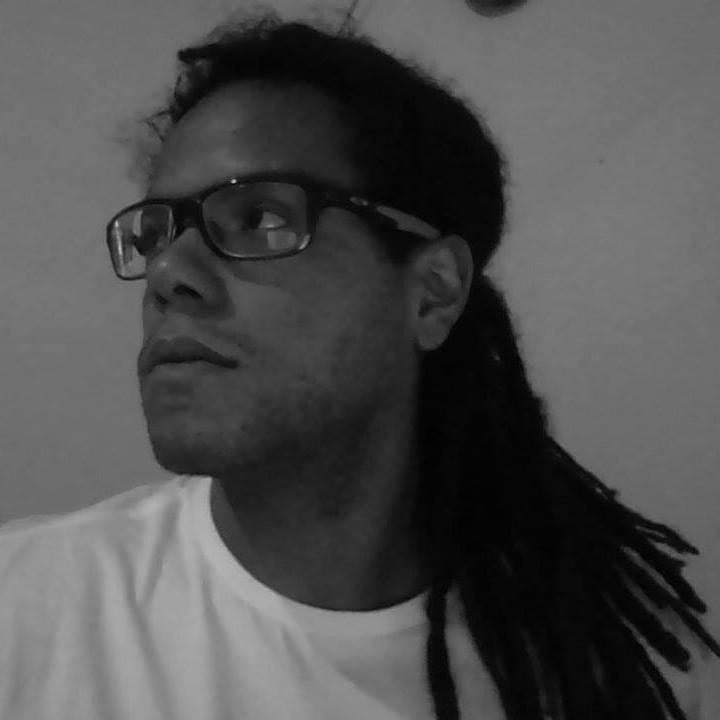

Get  http://techinterior.com.br/assets/images/speakers/robson.jpg


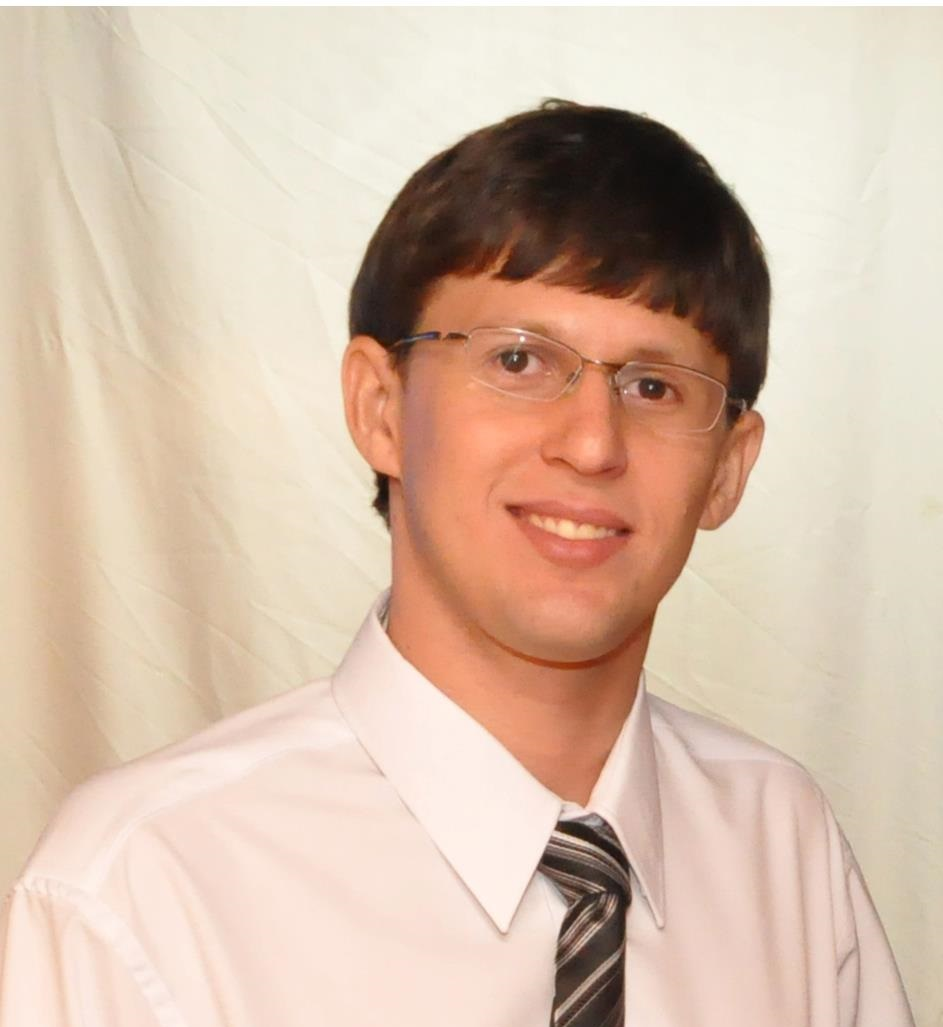

In [12]:
# Será mesmo?
for pic in pictures:
    print "Get ", pic
    display(Image(url= pic, width=100, height=100, embed=True))

In [13]:
# Falta uma descrição!
xpath_rows = "//section[@id='speakers']/div[@class='container']/div/div[@class='col-md-10']"
rows = parser.xpath(xpath_rows)

for num, row in enumerate(rows):
    descriptions = " ".join(row.xpath("./text()"))
    print "Palestrante: ", palestrantes[num]
    print u"Descrição:", descriptions
    print "*"*50
    print "\n"

def clean(text):
    """ remove new lines tabs """
    new_text = re.sub(r"[\t\r\n]", "", text)
    new_text = re.sub(r"\s+", " ", text)
    return new_text

print "\n\n*** LIMPANDO UM POUCO MAIS ***\n\n"

for num, row in enumerate(rows):
    descriptions = " ".join(row.xpath("./text()"))
    descriptions = clean(descriptions)
    print "Palestrante: ", palestrantes[num]
    print u"Descrição:", descriptions
    print "*"*50
    print "\n"


Palestrante:  Maurício "Maujor"
Descrição: 
                      "O Dinossauro das CSS" 
                    É um dos introdutores das CSS no Brasil. Criou e mantém o site ( ) destinado ao ensino das CSS e dos Padrões Web. 
					É um ativo frequentador de fóruns, escreve para vários portais brasileiros voltados a desenvolvedores web,tem vários artigos e trabalhos relacionados às CSS publicados em diversos sites. Maujor é autor de 14 livros sobre técnicas de desenvolvimento web ( ) 
                    Twitter:   | Facebook:  
                
**************************************************


Palestrante:  Felipe Nascimento de Moura
Descrição: 
                     
                    Desenvolve para web há mais de 10 anos, fundador e organizador da BrazilJS e outros projetos open source, além de alguns outros eventos regionais. 
                    Twitter:   | Facebook:   | Github:   | Site:  
                
**************************************************


Palestrante:  Ric

In [14]:
xpath_twitter = "//section[@id='speakers']/div[@class='container']/div/div[@class='col-md-10']/a[contains(@href, 'twitter.com')]/@href"
twitter_accounts = parser.xpath(xpath_twitter)

In [15]:
print twitter_accounts
screen_names = [t.split('/')[-1] for t in twitter_accounts]
print "Screen Names:", screen_names

['https://twitter.com/maujor', 'http://twitter.com/felipenmoura', 'http://twitter.com/richardrx', 'http://twitter.com/muriloijanc', 'http://twitter.com/londrix']
Screen Names: ['maujor', 'felipenmoura', 'richardrx', 'muriloijanc', 'londrix']


In [16]:
import tweepy
auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_key'], config['access_secret'])

api = tweepy.API(auth)

In [17]:
informations = {}
for sname in screen_names:
    print "Coletando Time Line: %s" % sname
    new_tweets = api.user_timeline(screen_name = sname, count=150)
    content = " ".join([c.text for c in new_tweets])
    informations[sname] = content
    time.sleep(1.5)

print informations

Coletando Time Line: maujor
Coletando Time Line: felipenmoura
Coletando Time Line: richardrx
Coletando Time Line: muriloijanc
Coletando Time Line: londrix
{'muriloijanc': u'RT @mjg59: I feel like $9 billion is a small price to pay for nobody ever using Java again Meu Filme: https://t.co/qQOMKTnXq9 via @YouTube RT @ramalhoorg: Cunha &amp; Dicaprio curtindo com a nossa cara #CPICIBER https://t.co/U4sklpHaGX via @gomex cortadobot: https://t.co/ASHo0cChVs via @YouTube https://t.co/PCoP1B1eM6 coleta das movimenta\xe7\xf5es de processos jur\xeddicos com python https://t.co/WE3DNFbzIt RT @telegram: Over 7 Million new users signed up for Telegram in the last 24 hours. Check out these unique features if you\'re new: https://\u2026 python consulta processo tjsp: https://t.co/SywuvkHrzw via @YouTube A minha ajudante developer team! https://t.co/OCKAtwxaxn 15km com umas subidinhas! Olha a cara de fingimento! Dor at\xe9 na alma!!! https://t.co/trKD9kdb3U kkk j\xe1 j\xe1 #MPR (Movimento Paga eu Rio)

In [18]:
import nltk
import string
from nltk.corpus import stopwords
top_words = {}
for user in informations.keys():
    allWords = nltk.tokenize.word_tokenize(informations[user])
    allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    pontuacao_extra = [x for x in string.punctuation]
    pontuacao_extra.extend([":", "@", "http", "https"])
    pontuacao_extra.extend(nltk.corpus.stopwords.words('english'))
    stopwords = nltk.corpus.stopwords.words('portuguese')+pontuacao_extra
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords and len(w) > 3)   
    top_words[user] = allWordExceptStopDist.most_common(10)

print top_words

{'londrix': [(u'united', 12), (u'inscreva-se', 12), (u'lumia', 10), (u'partir', 10), (u'twitter', 10), (u'voc\xea', 9), (u'boo-box', 9), (u'walmart_atende', 9), (u'hoje', 9), (u'pedido', 8)], 'muriloijanc': [(u'nissinmiojo', 40), (u'hoje', 12), (u'lab804', 9), (u'treino', 6), (u'semana', 5), (u'python', 5), (u'pessoal', 5), (u'ramalhoorg', 4), (u'baby', 3), (u'sabe', 3)], 'richardrx': [(u'design', 17), (u'user', 11), (u'mobile', 11), (u'experience', 7), (u'great', 5), (u'first', 5), (u'find', 5), (u'people', 5), (u'your', 5), (u'flockonus', 5)], 'maujor': [(u'maujor', 68), (u'site', 36), (u'moderniza\xe7\xe3o', 14), (u'voc\xea', 14), (u'sobre', 13), (u'mat\xe9ria', 11), (u'obrigado', 10), (u'livro', 9), (u'parab\xe9ns', 8), (u'livros', 8)], 'felipenmoura': [(u'braziljs', 12), (u'video', 11), (u'youtube', 11), (u'liked', 9), (u'cool', 8), (u'really', 8), (u'great', 6), (u'canaldootario', 6), (u'mountain', 6), (u'view', 6)]}


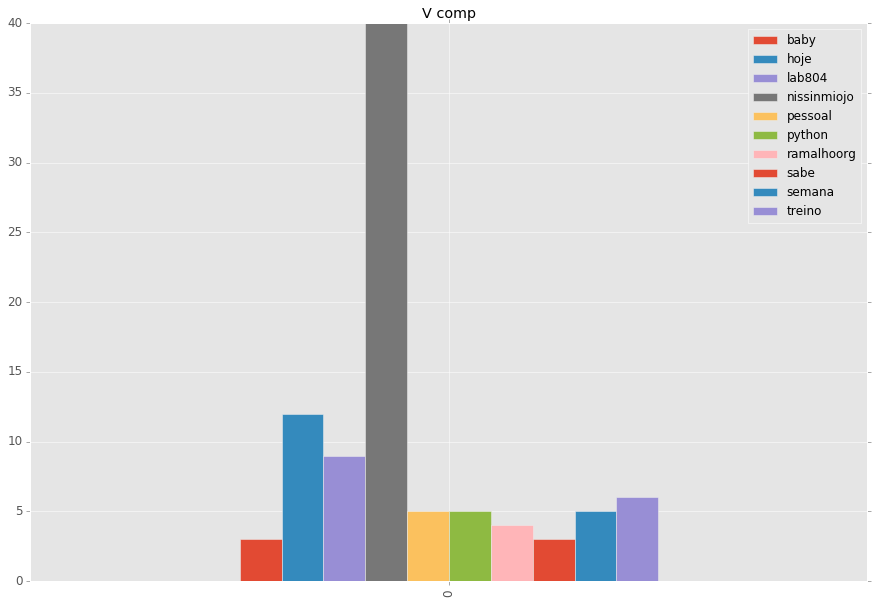

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

data= {}
for val in top_words['muriloijanc']:
    data[val[0]] = [val[1]]
    
df = pd.DataFrame(data)
ax = df.plot(kind='bar', 
              title ="V comp",
              figsize=(15,10),
              legend=True, fontsize=12)

    
